# **WHETGEO-1D 2.0**
## **PERISSINI FEDERICO 218299**
## **FINOTTI JACOPO 217936**
## Infiltrazione dell'acqua nel profilo di suolo


    - Authors: Niccolò Tubini, Concetta D'Amato and Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
_____ 

## Zona di studio: Schio (VI) <a class="anchor" id="Description"></a>

<figure>
    <img src="Figures/Schio.jpg" width="800" height="800/1.618"">
    <figcaption>Fig.1 Mappa della zona di studio nei pressi di Schio (VI), ipotesi tempesta Vaia (27.10.2018-29.10.2018). </figcaption>
<figure>                                                                                                                                   

## Schema del profilo del terreno di studio <a class="anchor" id="Description"></a>

Tutte le informazioni relative al profilo di terreno sono state prese dal seguente sito: https://www.arpa.veneto.it/temi-ambientali/suolo/geoportale/carta-dei-suoli-interattiva, il quale ci ha permesso di costruire un profilo di suolo che fosse il più veritiero possibile. 

Il suolo preso in considerazione è stato considerato solo per poter ipotizzare quale fosse stata la conseguenza del fenomeno Vaia se si fosse abbattuto nella zona del vicentino (Schio).

L'immagine mostra l'infiltrazione dell'acqua da uno strato di acqua accumulata in superficie di profondità $5$ [cm]. 

<figure>
    <img src="Figures/Profilo2.0.png" width="800" ">
    <figcaption>Fig.3 - WHETGEO-1D ex04. </figcaption>
<figure>
    
Inizialmente il suolo è insaturo e noi assumiamo che la pressione, all'inizio, abbia andamento idrostatico, con pressione dell'acqua pari a 0 sul fondo. Alla superficie del suolo è presente una falda di 5cm, rappresentante pressione costante come condizione al contorno iniziale, mentre sul fondo l'acqua drena a causa della forza di gravità e questo è rappresentanto da una condizione al contorno di "free drainage".

Questo esempio vuole mostrare:
- l'avanzare del fronte d'acqua nel suolo in termini di pressione d'acqua e di contenuto d'acqua
- il flusso attraverso la superficie del suolo e i vari strati

Griglia Computazionale

Per poter eseguire il modello: WHETGEO è necesaria una griglia computazionale che descrive il profilo del suolo sotto analisi. 
<figure>
    <img src="Figures/grid_2.0.png" width="800" height="800/1.618">
     <figcaption>Fig.4 - Griglia del suolo in analisi </figcaption>
<figure>
    

## Modello WHETGEO

L'esecuzione del modello viene eseguita per mezzo dei seguenti comandi.

In [1]:
import os
import sys
project_path = os.path.dirname(os.getcwd())
project_path

'C:\\Users\\Jacopo\\Desktop\\UNI\\Esercitazione-2\\OMS_Project_WHETGEO1D_23'

In [2]:
os.chdir(project_path+'\simulation')

In [3]:
# Impostata la location del progetto
proj_location = r"C:\Users\Jacopo\Desktop\UNI\II_semestre_3_anno\Idrologia\Esercitazione_2\OMS_Project_WHETGEO1D_23"
# Impostata la location della console
console_location = r"C:\Users\Jacopo\Desktop\UNI\II semestre 3 anno\Idrologia\Installations05122022\consoleOMS\oms-3.6.28-console"
# Impostato 
simulation="simulation/WHETGEO1D.sim"
os.chdir(proj_location)

In [4]:
!C:/Users/Jacopo/anaconda3/envs/geoframe_parigi/Library/bin/java  \
-Doms3.work={proj_location} \
-cp ".;{console_location}/*;lib/*;dist/*" oms3.CLI \
-r {simulation}

Error occurred during initialization of VM
Corrupted ZIP library: C:\Users\Jacopo\anaconda3\envs\geoframe_parigi\Library\bin\zip.dll


## Elaborazione Dati 

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
from geoframepy.timeseries import io_csv
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
ds = xr.open_dataset(project_path + '/output/ex2.0_peri_0000.nc')

---
# 1. Grafico errore bilancio di massa

Il bilancio di massa è un'equazione fondamentale per determinare il deflusso dell'acqua nei suoli. In questo grafico vediamo che però questo non è sempre rispettato e, a vari istanti di tempo, è presente un errore più o meno grande a seconda dell'istante cosniderato.

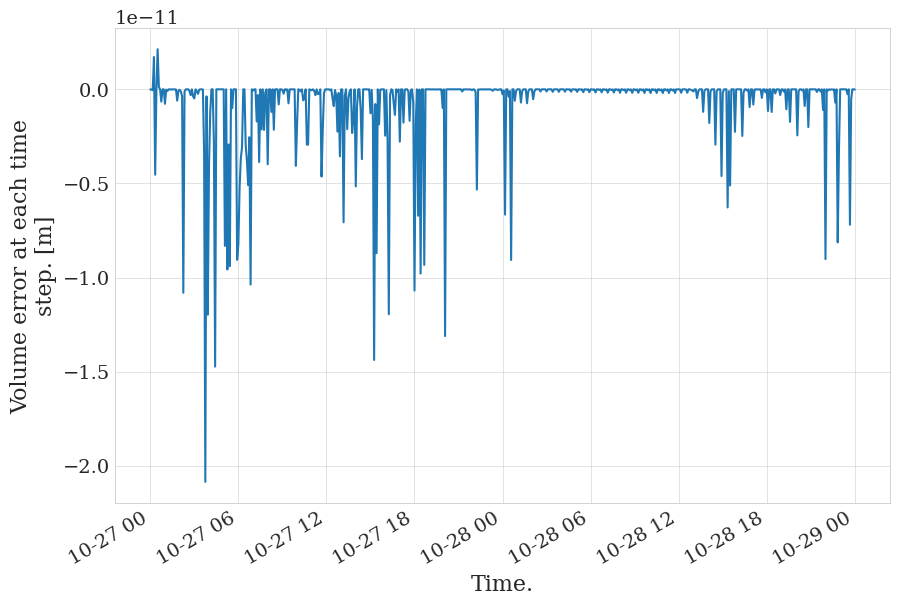

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
ds.error.plot(ax=ax)
plt.show()

---
# 2. Grafico della Suzione in funzione della profondità e del tempo.

La suzione è la capacità di un suolo insaturo di assorbire acqua ed è espressa come una pressione, negativa quando il suolo è insaturo mentre è positiva per suoli saturi. Al valore 0 è associato un terreno saturo. Dato che misurare il contenuto d'acqua di un suolo è molto complicato da svolgere in sito, si sono trovate le Soil Water Retention Curve (SWRC) che ci permettono di trovare un legame tra la suzione e il contenuto d'acqua.

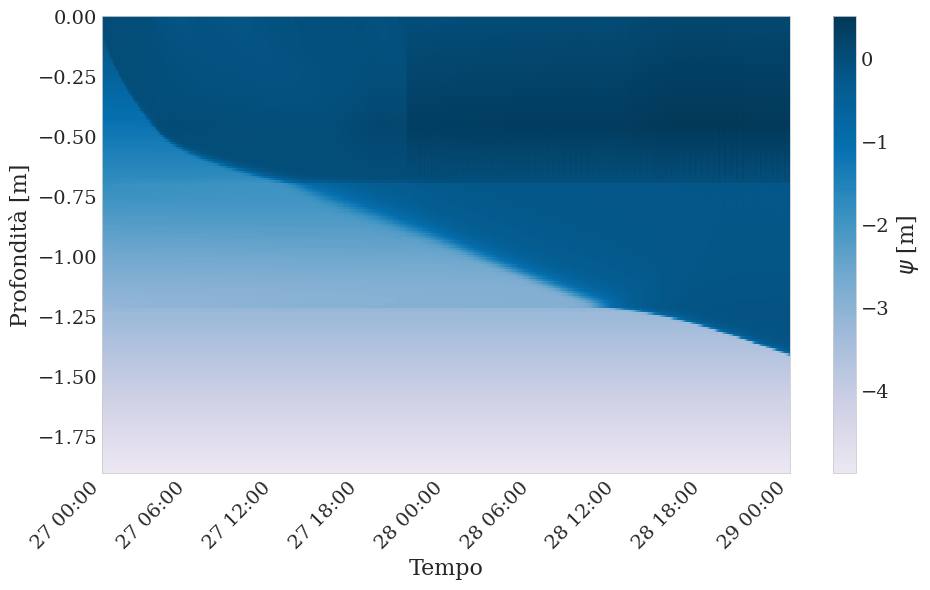

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

a = ds.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

---
# 3. Grafico del contenuto d'acqua in funzione della profondità e del tempo.

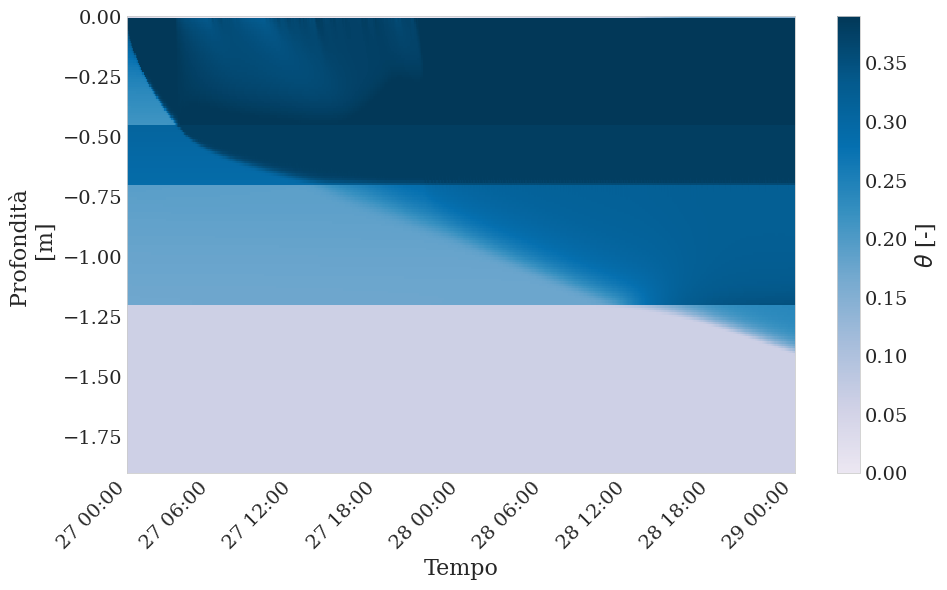

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Profondità \n [m]')
ax.set_xlabel('Tempo')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

---
# 4. Grafici di contenuto d'acqua e della suzione a differenti profondità

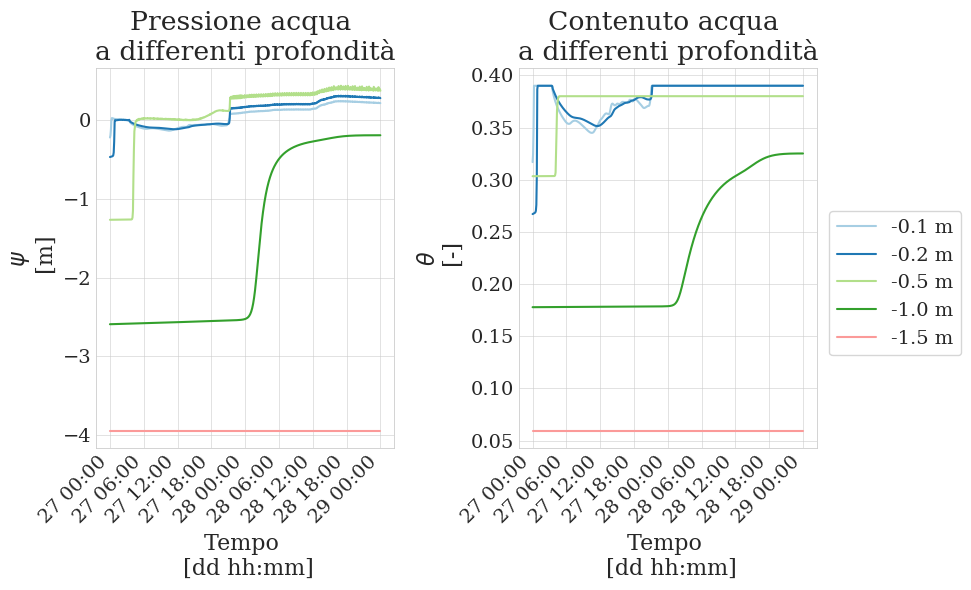

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Pressione acqua \na differenti profondità')


ax1.set_ylabel('$\psi$ \n [m]')
ax1.set_xlabel('Tempo \n [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Contenuto acqua \na differenti profondità')


ax2.set_ylabel('$\\theta$ \n [-]')
ax2.set_xlabel('Tempo \n [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

---
# 5. Grafici di contenuto d'acqua e della suzione in differenti fasce temporali

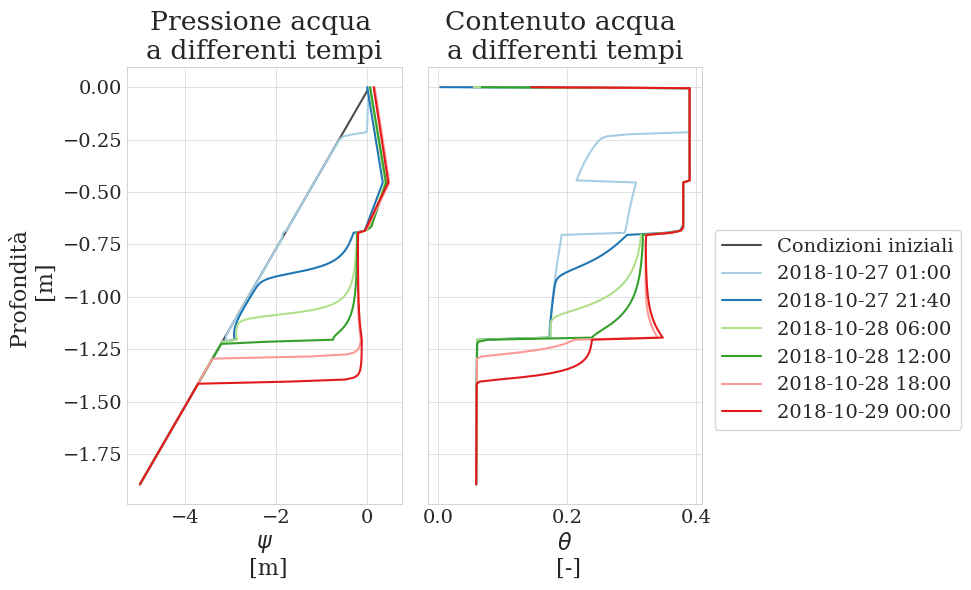

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
ds.psi.sel(time='2018-10-27 01:00').plot(ax=ax1, y='depth', label='2018-10-27 01:00', color=colors[0])
ds.psi.sel(time='2018-10-27 21:40').plot(ax=ax1, y='depth', label='2018-10-27 21:40', color=colors[1])
ds.psi.sel(time='2018-10-28 06:00').plot(ax=ax1, y='depth', label='2018-10-28 06:00', color=colors[2])
ds.psi.sel(time='2018-10-28 12:00').plot(ax=ax1, y='depth', label='2018-10-28 12:00', color=colors[3])
ds.psi.sel(time='2018-10-28 18:00').plot(ax=ax1, y='depth', label='2018-10-28 18:00', color=colors[4])
ds.psi.sel(time='2018-10-29 00:00').plot(ax=ax1, y='depth', label='2018-10-29 00:00', color=colors[5])

ax1.set_title('Pressione acqua \na differenti tempi')

ax1.set_ylabel('Profondità \n [m]')
ax1.set_xlabel('$\psi$ \n [m]')

# ds.psiIC.plot(y='depth', label='Initial condition', color='0.3')
plt.plot(np.nan, np.nan, label='Condizioni iniziali', color='0.3')
ds.theta.sel(time='2018-10-27 01:00').plot(ax=ax2, y='depth', label='2018-10-27 01:00', color=colors[0])
ds.theta.sel(time='2018-10-27 21:40').plot(ax=ax2, y='depth', label='2018-10-27 21:40', color=colors[1])
ds.theta.sel(time='2018-10-28 06:00').plot(ax=ax2, y='depth', label='2018-10-28 06:00', color=colors[2])
ds.theta.sel(time='2018-10-28 12:00').plot(ax=ax2, y='depth', label='2018-10-28 12:00', color=colors[3])
ds.theta.sel(time='2018-10-28 18:00').plot(ax=ax2, y='depth', label='2018-10-28 18:00', color=colors[4])
ds.theta.sel(time='2018-10-29 00:00').plot(ax=ax2, y='depth', label='2018-10-29 00:00', color=colors[5])

ax2.set_title('Contenuto acqua \na differenti tempi')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ \n [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

---
# 6. Grafico confronto Precipitazioni - Runoff

In [16]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/precip_perifino_concetta.csv',datetime_index=False)
rain.head()

,Datetime,0
0,2018-10-27 00:00:00,0.0
1,2018-10-27 00:05:00,0.0
2,2018-10-27 00:10:00,0.0
3,2018-10-27 00:15:00,0.0
4,2018-10-27 00:20:00,0.0


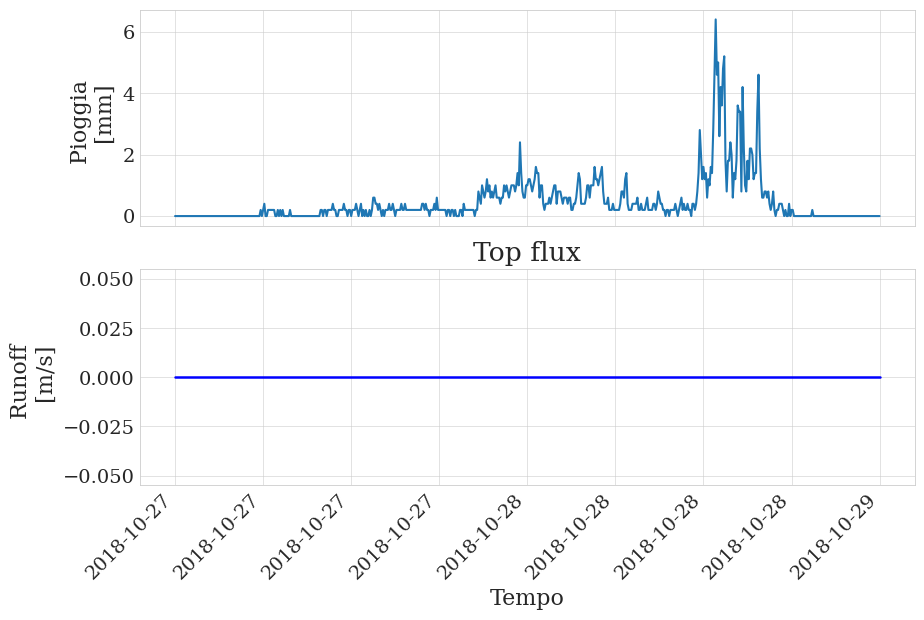

In [17]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Pioggia \n [mm]')


a = ds.runOff.sel(time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Runoff \n [m/s]')
ax[1].set_xlabel('Tempo')
plt.title('Top flux')

#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%D%H'))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.show()

---
# 8. Grafico Confronto Precipitazioni-Suzione

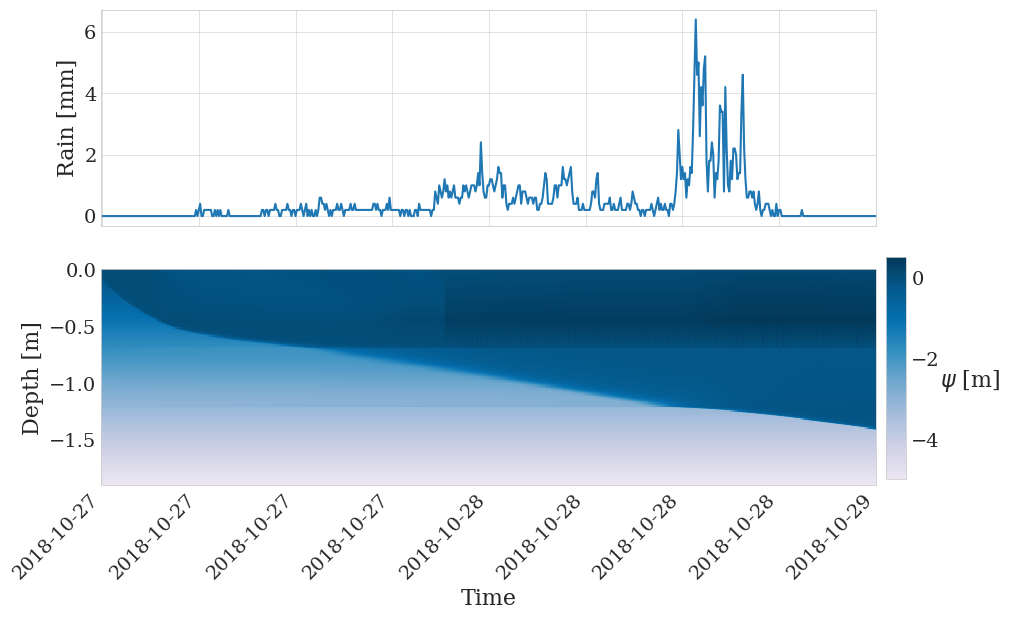

In [18]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
#due subplots, legenda di colori con gradazione da valore minimo a valore massimo
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))
#plot della precipitazione
ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')

#plot della psi
a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})
#titoli degli assi
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')

#formattare date in anno mese giorno
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%D%H'))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.36])

#informazioni e legenda e posizione della colorbar con nome

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)
#save figure
#plt.savefig('WaterContent1_5.png', dpi=300, bbox_inches = "tight")
#plt.tight_layout()
plt.show()